In [1]:
# Install ultralytics
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob

In [3]:
images_path = 'colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path  = 'colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = 'colorful_fashion_dataset_for_object_detection/'

In [4]:
from ultralytics import YOLO

# load pre-trained model
detection_model = YOLO("yolov8m.pt")

In [7]:
def convert(size,x,y,w,h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh
    box[0] = x-(w/2.0)
    box[1] = x+(w/2.0)
    box[2] = y-(h/2.0)
    box[3] = y+(h/2.0)

    return (box)

def plot_annotations(img, filename):
    with open(annotations_path+filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])

            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x,y,w,h)
            cv2.rectangle(img, (int(round(bb[0])),int(round(bb[2]))),(int(round(bb[1])),int(round(bb[3]))),(255,0,0),2)
            plt.axis('off')
            plt.imshow(img)

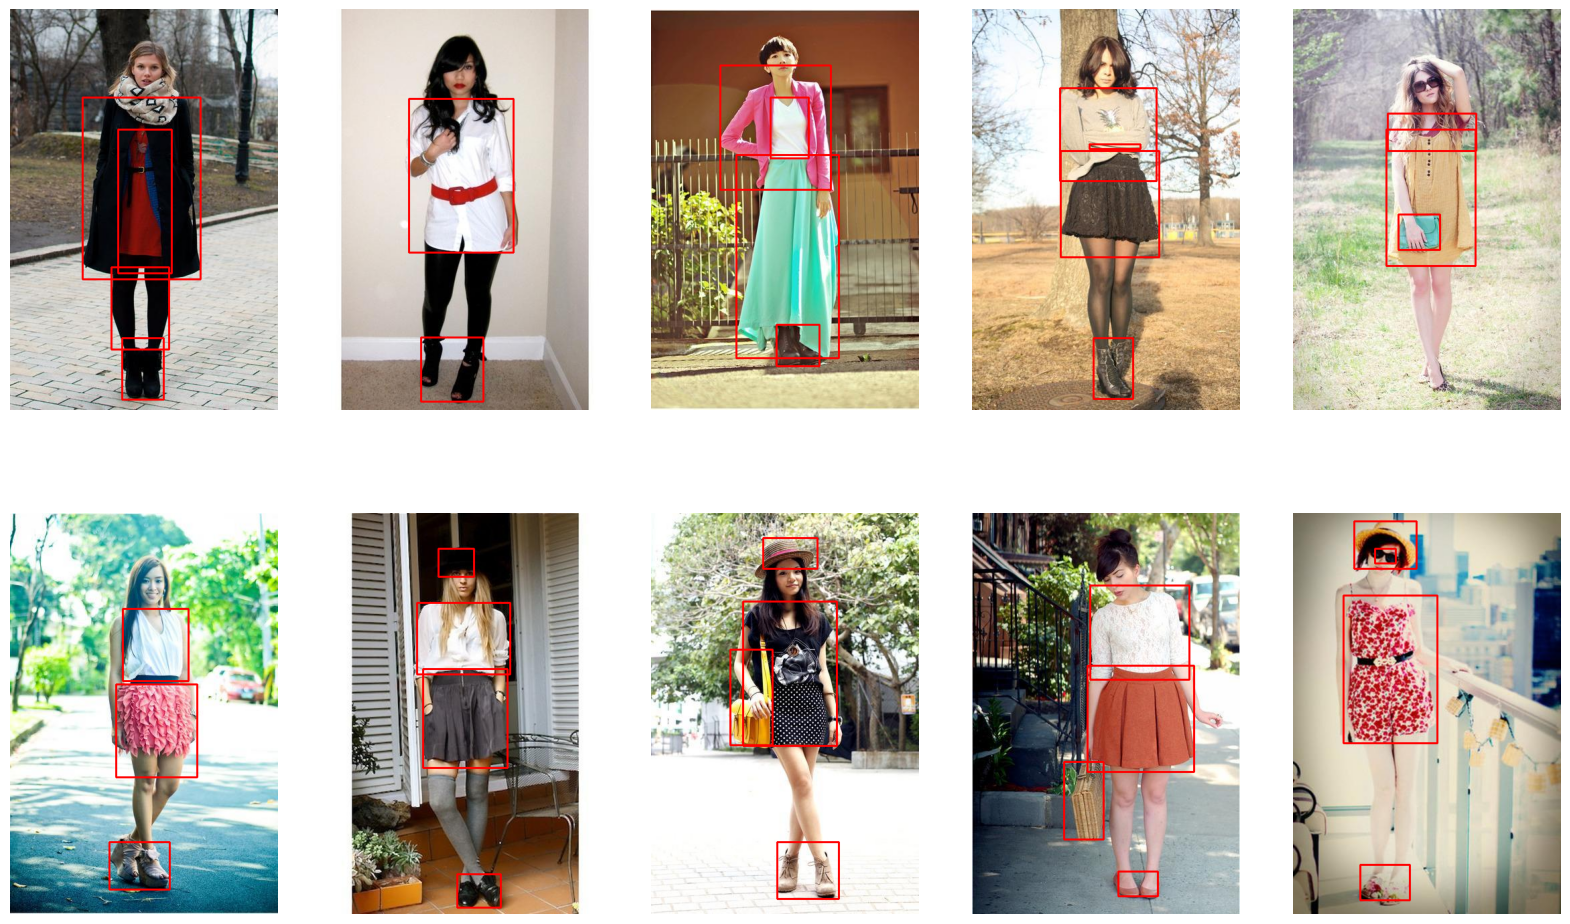

In [8]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(20,12))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):
    img = plt.imread(images_path+i)
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2,5, c)
    plot_annotations(img, i)
    c+=1

In [9]:
train = []
with open(path+'ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [10]:
len(train), len(test)

(2145, 537)

In [7]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [11]:
train_path = 'train/'
test_path = 'test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

Copying Train Data..!!


  0%|          | 0/2145 [00:00<?, ?it/s]

100%|██████████| 2145/2145 [01:11<00:00, 30.01it/s]


Copying Test Data..!!


100%|██████████| 537/537 [00:19<00:00, 27.91it/s]


In [11]:
text = """
train: C:/Users/Lenovo/Desktop/project/train
val: C:/Users/Lenovo/Desktop/project/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

In [ ]:
model = YOLO("yolov8m.pt")

model.train(data='data.yaml', epochs=5)

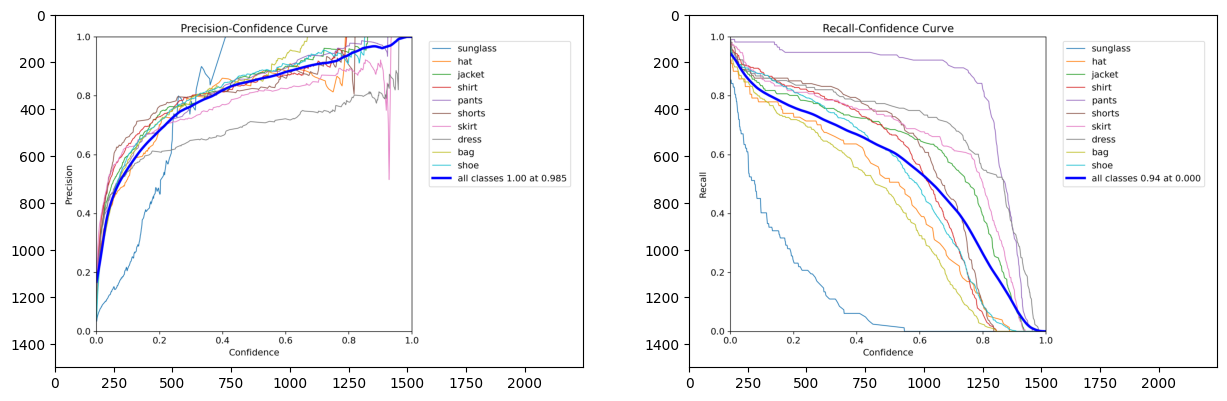

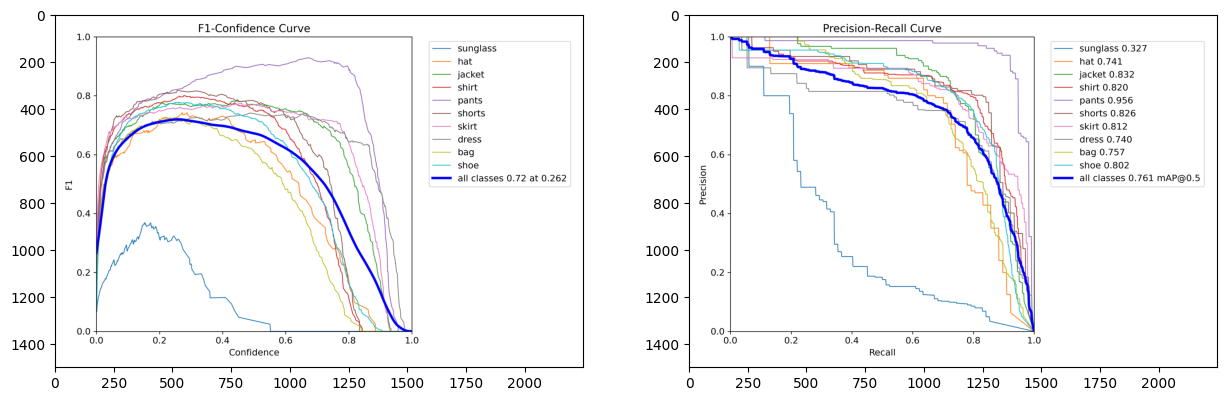

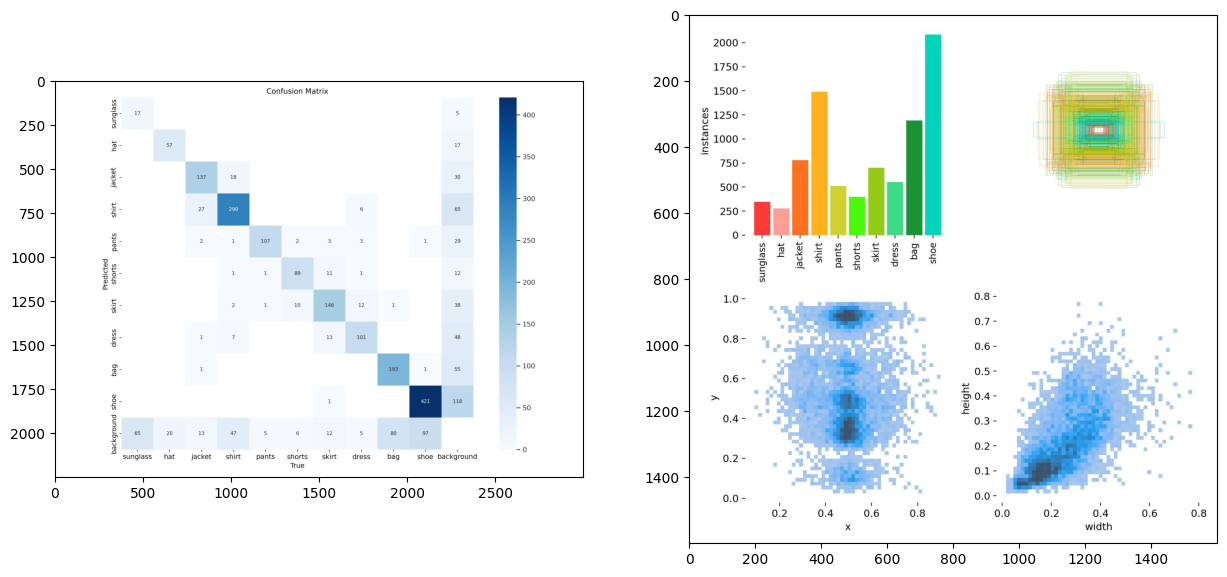

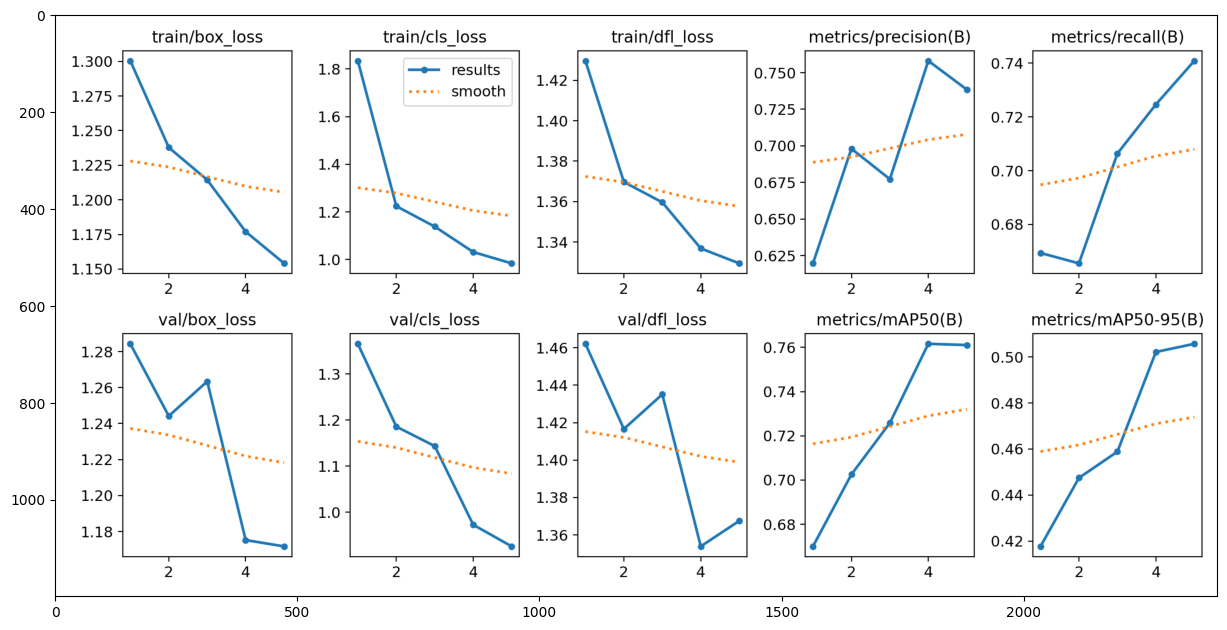

In [12]:
%matplotlib inline
model_path = 'runs/detect/train2/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

In [17]:
model = model = YOLO("runs/detect/train2/weights/best.pt")

WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'line_width' instead.

image 1/1 c:\Users\Lenovo\Desktop\ysa proje\colorful_fashion_dataset_for_object_detection\JPEGImages\10477.jpg: 640x448 1 shirt, 1 pants, 1 shoe, 1353.4ms
Speed: 5.0ms preprocess, 1353.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\detect\predict
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'line_width' instead.

image 1/1 c:\Users\Lenovo\Desktop\ysa proje\colorful_fashion_dataset_for_object_detection\JPEGImages\47502.jpg: 640x448 1 jacket, 2 dresss, 1 shoe, 982.4ms
Speed: 3.0ms preprocess, 982.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\detect\predict
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'line_width' instead.

image 1/1 c:\Users\Len

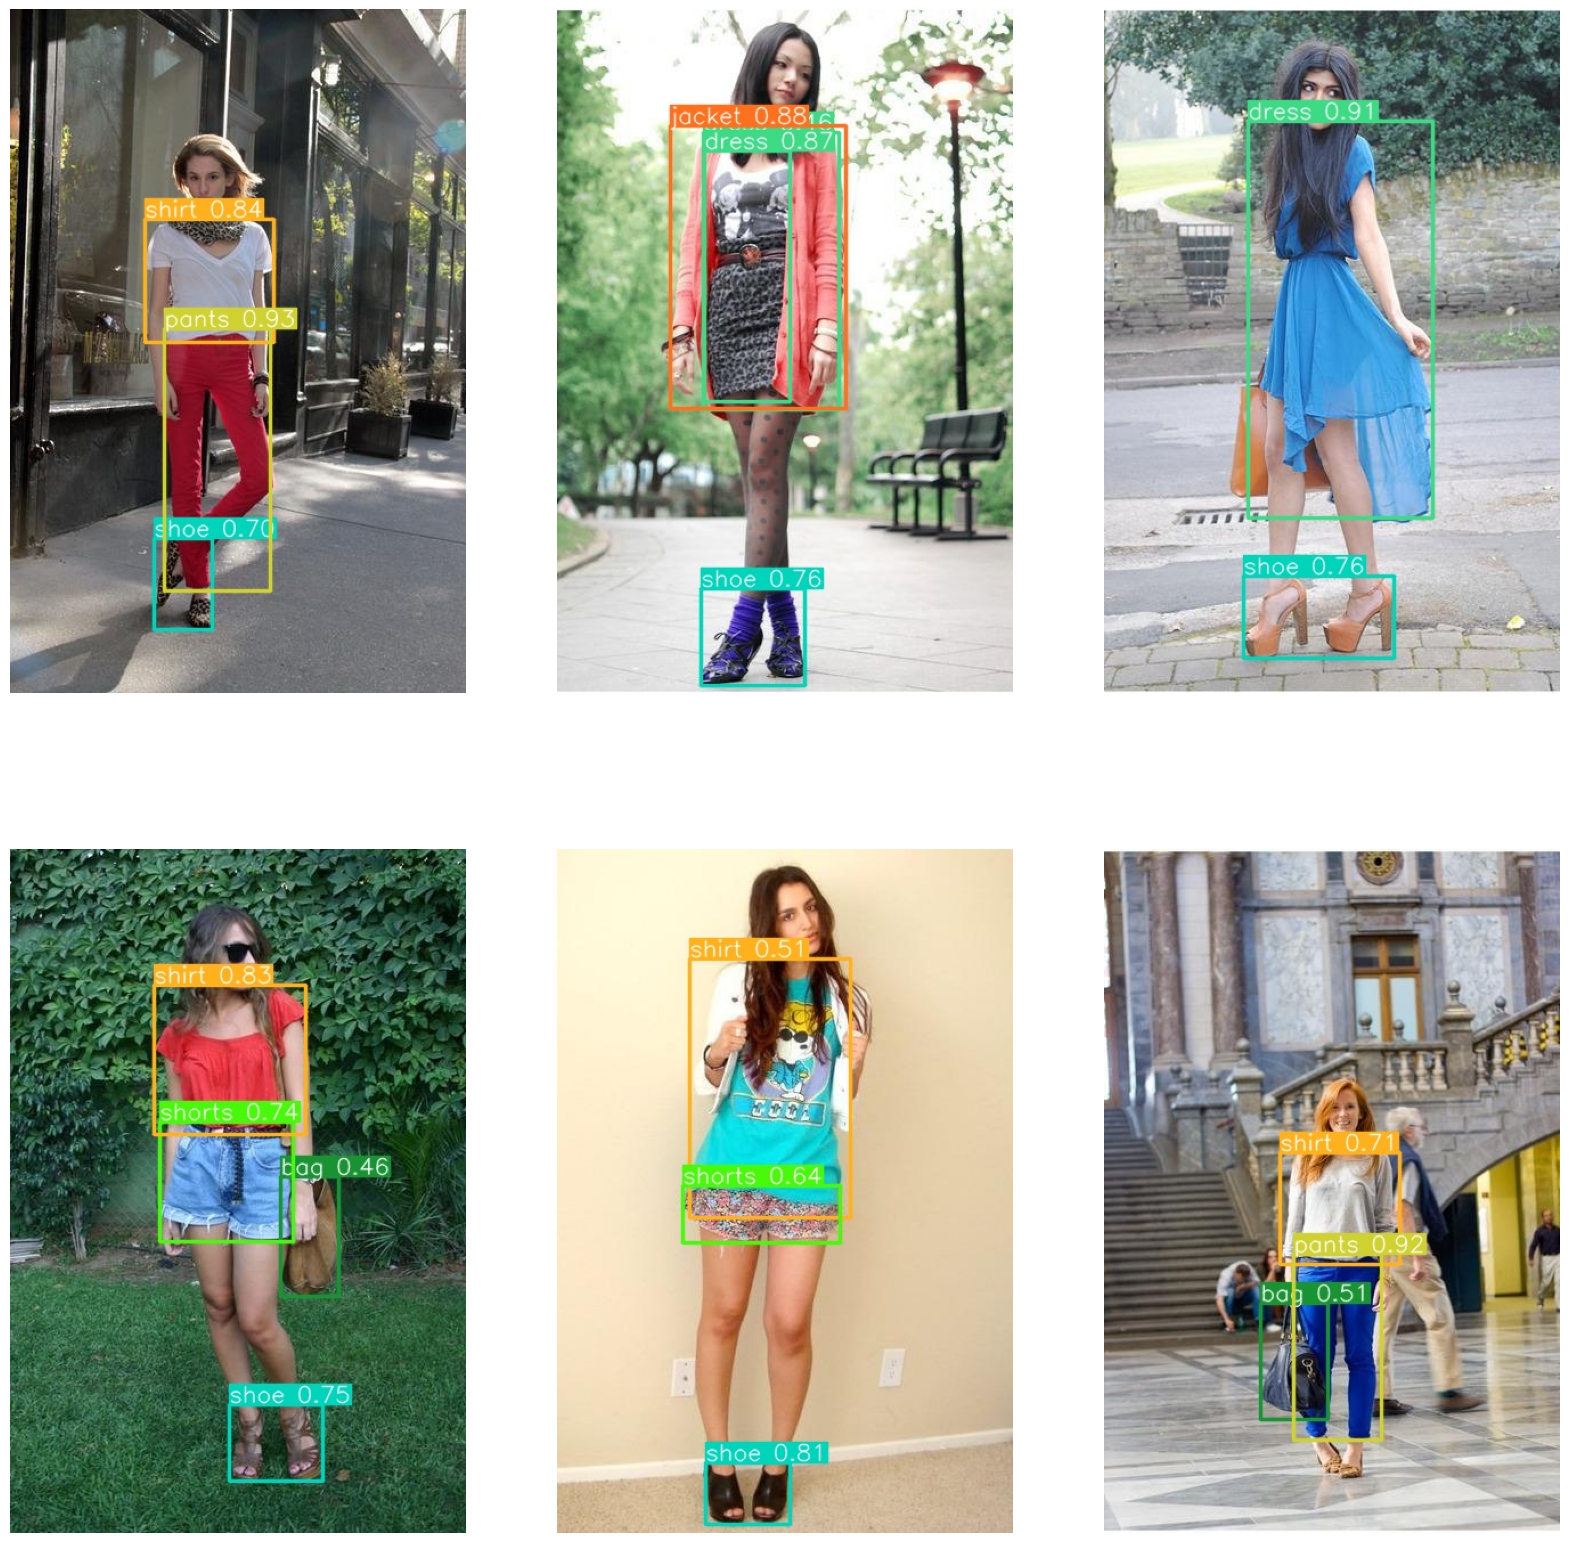

In [19]:
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 6)
c=1
for img in imgs:
    i=model.predict(source=images_path+img, conf=0.4, save=True, line_thickness=2)

    im = plt.imread('runs/detect/predict/'+img)
    plt.subplot(2,3,c)
    plt.axis('off')
    plt.imshow(im)
    c+=1